In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from qdm.config.system import System
from qdm.measurements.esr import ESR
from qdm.routines.esr_optim import esr_optim

In [3]:
# create an object of the system and initalise the equipment
# qdm = System(name = "cryo",
#              config_file='../src/qdm/config/cryo.json') 

qdm = System(name = "GMX",
             tag="testing",
             config_file='../../src/qdm/config/GMX.json') 



Using the custom tag: ( testing ) for the data directory.
Connected to Camera: ZYLA-5.5-USB3-W
Connected to rf source: windfreak


In [5]:
# Define rf parameters
qdm.rf.freq = 3500
qdm.rf.power = -22
qdm.rf.output = 1

# Define camera parameters
qdm.cam.image_size = (256, 256)
qdm.cam.bin = 1


Setting the roi to:  (1152, 1408, 952, 1208)


In [6]:
# Define the ESR measurement parameters
ODMR = ESR(qdm, 
                 int_time = 50e-3,
                 freq_center= 3500,
                 freq_range = 200,
                 freq_num = 101,
                 esr_type= "cw",
                 ref_bool = True,
                 ref_type = "no_rf",
                 laser_dur = 8e-6,
                 rf_dur = 300e-9) 

Resonant frequency: 3506.32 (MHz)
FWHM: 19.6 (MHz)
contrast: 0.2 (%)
amplitude: 3874.9 (cps)
counts: 24960.0 (cps)
Sensitivity: 22.0 (μT/√Hz)


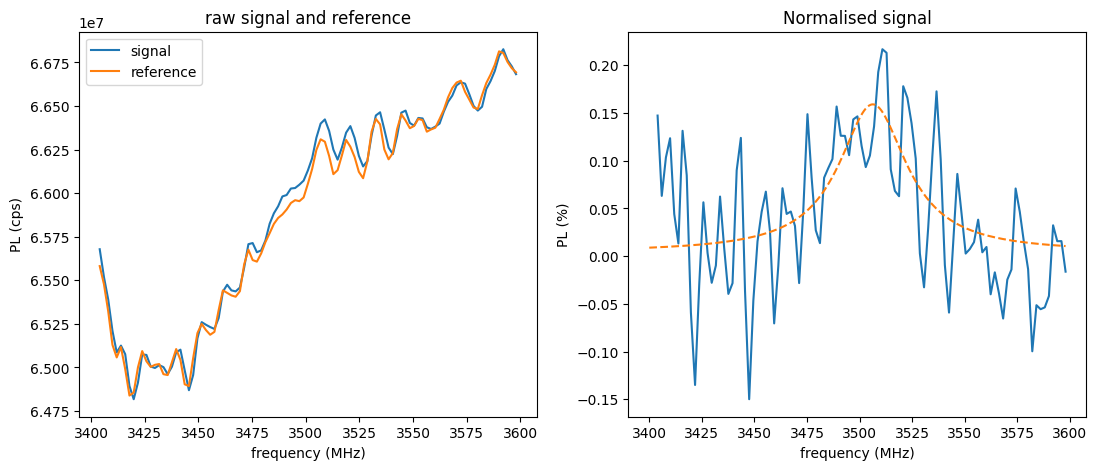

In [11]:
ODMR.start(num_sweeps=2)
ODMR.plot_spectra(remove_start=2,bfit=True)

In [46]:
from qdm.routines.parameter_sweep import Param_sweep
fit_opts = {"peak_neg": False, "remove_start": 2}

meas_sweep = Param_sweep(qdm,
                         ODMR,
                         meas_sweeps = 5,
                         Device= qdm.rf,
                         device_param="power",
                         min_val=-30,
                         max_val=-20,
                         num=11,
                         bfit=True,
                         fit_opts=fit_opts)



In [47]:
meas_sweep.start()

Resonant frequency: 3503.42 (MHz)
FWHM: 22.5 (MHz)
contrast: 0.2 (%)
amplitude: 4572.6 (cps)
counts: 24952.0 (cps)
Sensitivity: 21.4 (μT/√Hz)
Resonant frequency: 3495.48 (MHz)
FWHM: 20.8 (MHz)
contrast: 0.2 (%)
amplitude: 4578.9 (cps)
counts: 25812.0 (cps)
Sensitivity: 20.1 (μT/√Hz)
Resonant frequency: 3488.24 (MHz)
FWHM: 27.6 (MHz)
contrast: 0.2 (%)
amplitude: 4929.2 (cps)
counts: 26052.0 (cps)
Sensitivity: 24.8 (μT/√Hz)
Resonant frequency: 3494.02 (MHz)
FWHM: 18.3 (MHz)
contrast: 0.2 (%)
amplitude: 4144.6 (cps)
counts: 26532.0 (cps)
Sensitivity: 19.7 (μT/√Hz)
Resonant frequency: 3493.58 (MHz)
FWHM: 20.3 (MHz)
contrast: 0.2 (%)
amplitude: 4193.6 (cps)
counts: 25520.0 (cps)
Sensitivity: 21.2 (μT/√Hz)
Resonant frequency: 3491.47 (MHz)
FWHM: 18.9 (MHz)
contrast: 0.2 (%)
amplitude: 3784.2 (cps)
counts: 24816.0 (cps)
Sensitivity: 21.6 (μT/√Hz)
Resonant frequency: 3488.67 (MHz)
FWHM: 17.6 (MHz)
contrast: 0.2 (%)
amplitude: 3718.9 (cps)
counts: 24276.0 (cps)
Sensitivity: 20.3 (μT/√Hz)
Resona

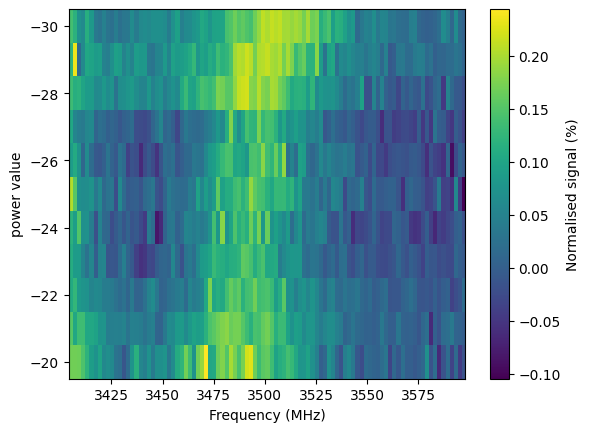

In [48]:
meas_sweep.plot(remove_start = 2, sig_type="norm")

In [49]:
data_dict = meas_sweep.save()

Data stored successfully!


In [50]:
data_dict['val_list']

f_fit = []
a_fit = []
w_fit = []
c_fit = []

for fit in data_dict['fit_params']:
    f_fit.append(fit[0])
    a_fit.append(fit[1])
    w_fit.append(fit[2])
    c_fit.append(fit[3])


[3503.422061360367,
 3495.4762221804517,
 3488.244283938708,
 3494.022852451543,
 3493.582737167029,
 3491.4730713259787,
 3488.674175268879,
 3488.126818413006,
 3488.8920800626206,
 3485.150526917481,
 3480.7111097221964]

Text(0, 0.5, 'background (norm.)')

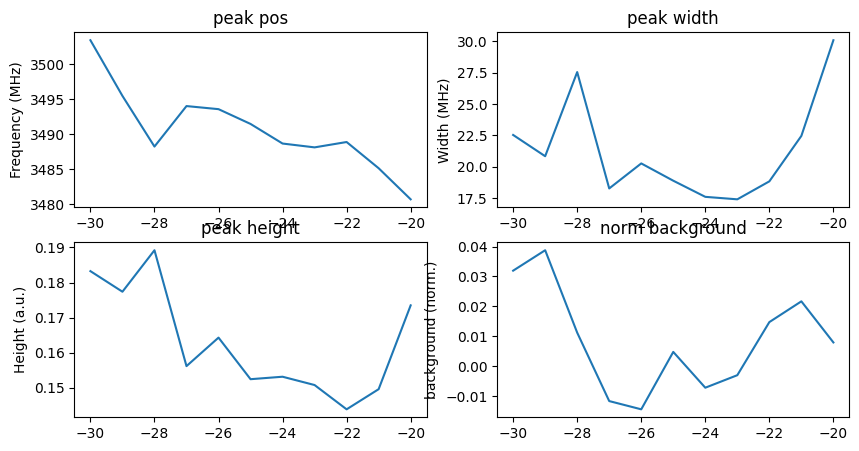

In [56]:
# Plot the fit results
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(data_dict['param_val_list'], f_fit)
plt.title('peak pos')
plt.ylabel('Frequency (MHz)')

plt.subplot(2,2,2)
plt.plot(data_dict['param_val_list'], np.abs(w_fit))
plt.title('peak width')
plt.ylabel('Width (MHz)')

plt.subplot(2,2,3)
plt.plot(data_dict['param_val_list'], a_fit)
plt.title('peak height')
plt.ylabel('Height (a.u.)')

plt.subplot(2,2,4)
plt.plot(data_dict['param_val_list'], c_fit)
plt.title('norm background')
plt.ylabel('background (norm.)')



Text(0, 0.5, 'Sensitivity (μT/√Hz)')

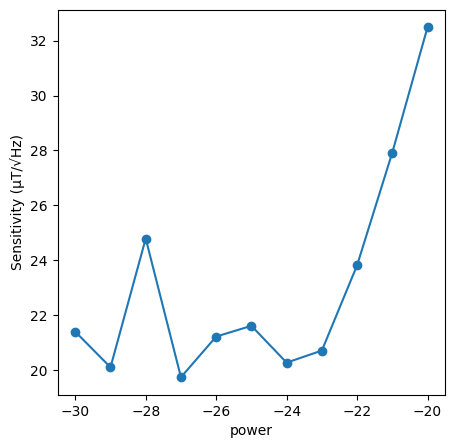

In [53]:

# plot the sensitivity
plt.figure(figsize=(5,5))
plt.plot(data_dict['val_list'], 1e6*data_dict['sensitivity_list'], 'o-')
plt.xlabel(meas_sweep.device_param)
plt.ylabel("Sensitivity (μT/√Hz)")

In [61]:
# Define the ESR measurement parameters
qdm.rf.power = -22
pODMR = ESR(qdm, 
                 int_time = 50e-3,
                 freq_center= 3480,
                 freq_range = 200,
                 freq_num = 101,
                 esr_type= "pulsed",
                 ref_bool = True,
                 ref_type = "no_rf",
                 laser_dur = 1e-6,
                 rf_dur = 1000e-9) 

In [62]:
pODMR.start(num_sweeps=2)

Resonant frequency: 3480.71 (MHz)
FWHM: 30.1 (MHz)
contrast: 0.2 (%)
amplitude: 3731.2 (cps)
counts: 21504.0 (cps)
Sensitivity: 32.5 (μT/√Hz)


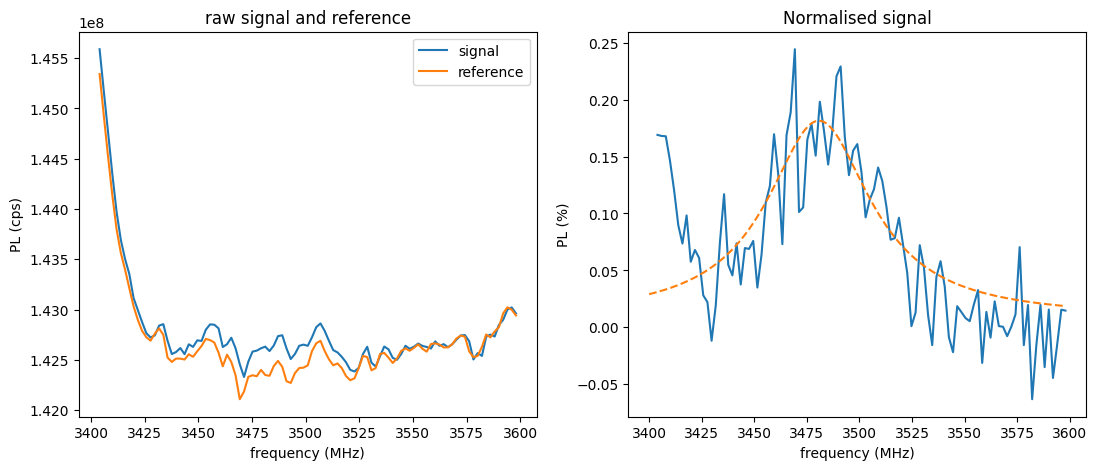

In [63]:
ODMR.plot_spectra(remove_start=2,bfit=True)

In [ ]:
fit_opts = {"peak_neg": False, "remove_start": 2}


laser_sweep = Param_sweep(qdm,
                         ODMR,
                         meas_param = "laser_dur",
                         meas_sweeps = 5,
                         min_val=  1e-6,
                         max_val=  30e-6,
                         num=31,
                         bfit=True,
                         fit_opts=fit_opts)


In [ ]:
laser_sweep.start()